# Multiclass classification

* We've just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from SKLearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate : 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to draw the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset  with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1)

In [3]:
X.shape, y.shape

((1200, 8), (1200,))

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

In [4]:
import matplotlib.pyplot as plt

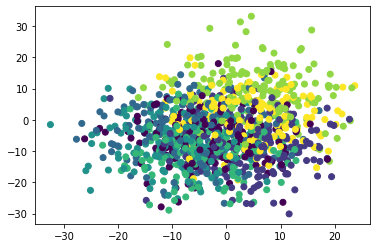

In [8]:
plt.scatter(X[:,3],X[:,6],c=y)

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

In [0]:
# YOUR CODE HERE

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<details>
    <summary><i> Is there an analogy between the <b>to_categorical</b> of Tensorflow/Keras and the <b>OneHotEncoder</b> of Scikit-Learn ?</i></summary>
    

We could say so ! In a sense, *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called`y_cat`. ❓

In [10]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat = to_categorical(y)
y

array([2, 2, 5, ..., 1, 3, 0])

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method** :  Split the dataset $X$ and $y_{cat}$  into a _train_ and _test_ set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test` ❓

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, train_size=0.7)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling** : Fit a SkLearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

❓ **Initializing a model** :  Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclassification task 
    - which outputs probabilities of belonging to each class ❓

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = models.Sequential()
    
    model.add(layers.Dense(50, activation='relu', input_dim=8))
    
    model.add(layers.Dense(7, activation = 'softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy',# different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [25]:
model.count_params()

807

❓ **Fitting the model** : Fit your model on the train data with 50 epochs and plot the history ❓

In [26]:
model.fit(X_train,y_train, epochs=50, batch_size = 32)

Epoch 1/50
27/27 [==============================] - 0s 791us/step - loss: 4.2347 - accuracy: 0.2083
Epoch 2/50
27/27 [==============================] - 0s 723us/step - loss: 2.4251 - accuracy: 0.3786
Epoch 3/50
27/27 [==============================] - 0s 727us/step - loss: 1.6753 - accuracy: 0.5107
Epoch 4/50
27/27 [==============================] - 0s 601us/step - loss: 1.3299 - accuracy: 0.5690
Epoch 5/50
27/27 [==============================] - 0s 624us/step - loss: 1.1470 - accuracy: 0.6060
Epoch 6/50
27/27 [==============================] - 0s 655us/step - loss: 1.0327 - accuracy: 0.6452
Epoch 7/50
27/27 [==============================] - 0s 644us/step - loss: 0.9623 - accuracy: 0.6536
Epoch 8/50
27/27 [==============================] - 0s 616us/step - loss: 0.9175 - accuracy: 0.6810
Epoch 9/50
27/27 [==============================] - 0s 637us/step - loss: 0.8834 - accuracy: 0.6762
Epoch 10/50
27/27 [==============================] - 0s 620us/step - loss: 0.8508 - accuracy: 0.6905

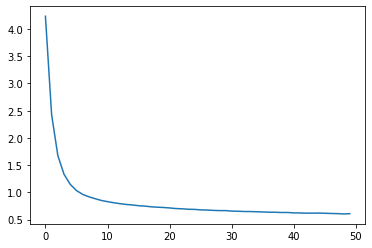

In [29]:
plt.plot(range(50),model.history.__dict__['history']['loss'])

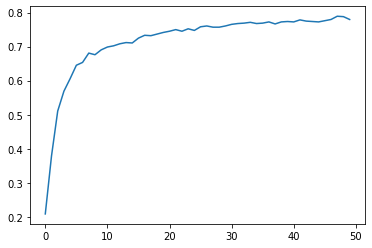

In [30]:
plt.plot(range(50),model.history.__dict__['history']['accuracy'])

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [31]:
model.evaluate(ss.transform(X_test),y_test)

12/12 [==============================] - 0s 575us/step - loss: 1.5401 - accuracy: 0.5306


[1.5400515794754028, 0.5305555462837219]

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [32]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [46]:
[0., 0., 0., 0, 0., 0., 1.] == list(y_test[1,:])

True

In [53]:

accuracy_baseline = 1/7
accuracy_baseline

0.14285714285714285

🧪 **Test your code**

In [52]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/03-Multiclass-classification
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_baseline.py::TestBaseline::test_accuracy PASSED               [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master


❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stopping it so soon ❓❗

❓Let's re-initialize and re-run the model with 1000 epochs this time and plot the history. ❓

In [57]:
model = initialize_model()
model.fit(X_train,y_train, epochs=1000, batch_size = 32)

Epoch 1/1000
27/27 [==============================] - 0s 991us/step - loss: 8.2331 - accuracy: 0.1667
Epoch 2/1000
27/27 [==============================] - 0s 683us/step - loss: 4.4455 - accuracy: 0.2286
Epoch 3/1000
27/27 [==============================] - 0s 715us/step - loss: 2.6406 - accuracy: 0.3524
Epoch 4/1000
27/27 [==============================] - 0s 630us/step - loss: 1.7920 - accuracy: 0.4750
Epoch 5/1000
27/27 [==============================] - 0s 644us/step - loss: 1.3876 - accuracy: 0.5405
Epoch 6/1000
27/27 [==============================] - 0s 720us/step - loss: 1.1815 - accuracy: 0.5988
Epoch 7/1000
27/27 [==============================] - 0s 640us/step - loss: 1.0692 - accuracy: 0.6262
Epoch 8/1000
27/27 [==============================] - 0s 664us/step - loss: 0.9959 - accuracy: 0.6607
Epoch 9/1000
27/27 [==============================] - 0s 643us/step - loss: 0.9506 - accuracy: 0.6714
Epoch 10/1000
27/27 [==============================] - 0s 589us/step - loss: 0.913

27/27 [==============================] - 0s 645us/step - loss: 0.5610 - accuracy: 0.8012
Epoch 81/1000
27/27 [==============================] - 0s 610us/step - loss: 0.5559 - accuracy: 0.8131
Epoch 82/1000
27/27 [==============================] - 0s 788us/step - loss: 0.5490 - accuracy: 0.8167
Epoch 83/1000
27/27 [==============================] - 0s 593us/step - loss: 0.5500 - accuracy: 0.8119
Epoch 84/1000
27/27 [==============================] - 0s 591us/step - loss: 0.5448 - accuracy: 0.8179
Epoch 85/1000
27/27 [==============================] - 0s 600us/step - loss: 0.5434 - accuracy: 0.8131
Epoch 86/1000
27/27 [==============================] - 0s 579us/step - loss: 0.5447 - accuracy: 0.8155
Epoch 87/1000
27/27 [==============================] - 0s 621us/step - loss: 0.5480 - accuracy: 0.8119
Epoch 88/1000
27/27 [==============================] - 0s 635us/step - loss: 0.5393 - accuracy: 0.8214
Epoch 89/1000
27/27 [==============================] - 0s 599us/step - loss: 0.5386 - a

27/27 [==============================] - 0s 590us/step - loss: 0.4549 - accuracy: 0.8357
Epoch 160/1000
27/27 [==============================] - 0s 642us/step - loss: 0.4498 - accuracy: 0.8429
Epoch 161/1000
27/27 [==============================] - 0s 932us/step - loss: 0.4506 - accuracy: 0.8417
Epoch 162/1000
27/27 [==============================] - 0s 826us/step - loss: 0.4506 - accuracy: 0.8464
Epoch 163/1000
27/27 [==============================] - 0s 557us/step - loss: 0.4493 - accuracy: 0.8405
Epoch 164/1000
27/27 [==============================] - 0s 557us/step - loss: 0.4560 - accuracy: 0.8500
Epoch 165/1000
27/27 [==============================] - 0s 570us/step - loss: 0.4458 - accuracy: 0.8357
Epoch 166/1000
27/27 [==============================] - 0s 556us/step - loss: 0.4501 - accuracy: 0.8464
Epoch 167/1000
27/27 [==============================] - 0s 544us/step - loss: 0.4533 - accuracy: 0.8381
Epoch 168/1000
27/27 [==============================] - 0s 548us/step - loss: 0

27/27 [==============================] - 0s 576us/step - loss: 0.3770 - accuracy: 0.8655
Epoch 238/1000
27/27 [==============================] - 0s 577us/step - loss: 0.3828 - accuracy: 0.8655
Epoch 239/1000
27/27 [==============================] - 0s 560us/step - loss: 0.3732 - accuracy: 0.8655
Epoch 240/1000
27/27 [==============================] - 0s 546us/step - loss: 0.3783 - accuracy: 0.8667
Epoch 241/1000
27/27 [==============================] - 0s 548us/step - loss: 0.3765 - accuracy: 0.8726
Epoch 242/1000
27/27 [==============================] - 0s 527us/step - loss: 0.3725 - accuracy: 0.8798
Epoch 243/1000
27/27 [==============================] - 0s 563us/step - loss: 0.3691 - accuracy: 0.8738
Epoch 244/1000
27/27 [==============================] - 0s 554us/step - loss: 0.3703 - accuracy: 0.8655
Epoch 245/1000
27/27 [==============================] - 0s 543us/step - loss: 0.3685 - accuracy: 0.8714
Epoch 246/1000
27/27 [==============================] - 0s 560us/step - loss: 0

27/27 [==============================] - 0s 579us/step - loss: 0.3162 - accuracy: 0.8881
Epoch 316/1000
27/27 [==============================] - 0s 583us/step - loss: 0.3208 - accuracy: 0.8857
Epoch 317/1000
27/27 [==============================] - 0s 538us/step - loss: 0.3197 - accuracy: 0.8869
Epoch 318/1000
27/27 [==============================] - 0s 547us/step - loss: 0.3168 - accuracy: 0.8929
Epoch 319/1000
27/27 [==============================] - 0s 537us/step - loss: 0.3194 - accuracy: 0.8917
Epoch 320/1000
27/27 [==============================] - 0s 590us/step - loss: 0.3182 - accuracy: 0.8905
Epoch 321/1000
27/27 [==============================] - 0s 567us/step - loss: 0.3255 - accuracy: 0.8857
Epoch 322/1000
27/27 [==============================] - 0s 550us/step - loss: 0.3183 - accuracy: 0.8869
Epoch 323/1000
27/27 [==============================] - 0s 552us/step - loss: 0.3200 - accuracy: 0.8905
Epoch 324/1000
27/27 [==============================] - 0s 546us/step - loss: 0

27/27 [==============================] - 0s 672us/step - loss: 0.2765 - accuracy: 0.9083
Epoch 394/1000
27/27 [==============================] - 0s 646us/step - loss: 0.2759 - accuracy: 0.9167
Epoch 395/1000
27/27 [==============================] - 0s 568us/step - loss: 0.2754 - accuracy: 0.9083
Epoch 396/1000
27/27 [==============================] - 0s 533us/step - loss: 0.2752 - accuracy: 0.9119
Epoch 397/1000
27/27 [==============================] - 0s 562us/step - loss: 0.2762 - accuracy: 0.9048
Epoch 398/1000
27/27 [==============================] - 0s 527us/step - loss: 0.2741 - accuracy: 0.9143
Epoch 399/1000
27/27 [==============================] - 0s 525us/step - loss: 0.2736 - accuracy: 0.9107
Epoch 400/1000
27/27 [==============================] - 0s 510us/step - loss: 0.2732 - accuracy: 0.9143
Epoch 401/1000
27/27 [==============================] - 0s 537us/step - loss: 0.2728 - accuracy: 0.9060
Epoch 402/1000
27/27 [==============================] - 0s 539us/step - loss: 0

Epoch 472/1000
27/27 [==============================] - 0s 594us/step - loss: 0.2315 - accuracy: 0.9274
Epoch 473/1000
27/27 [==============================] - 0s 551us/step - loss: 0.2402 - accuracy: 0.9238
Epoch 474/1000
27/27 [==============================] - 0s 548us/step - loss: 0.2339 - accuracy: 0.9262
Epoch 475/1000
27/27 [==============================] - 0s 554us/step - loss: 0.2336 - accuracy: 0.9286
Epoch 476/1000
27/27 [==============================] - 0s 525us/step - loss: 0.2397 - accuracy: 0.9262
Epoch 477/1000
27/27 [==============================] - 0s 549us/step - loss: 0.2350 - accuracy: 0.9298
Epoch 478/1000
27/27 [==============================] - 0s 547us/step - loss: 0.2364 - accuracy: 0.9250
Epoch 479/1000
27/27 [==============================] - 0s 551us/step - loss: 0.2310 - accuracy: 0.9274
Epoch 480/1000
27/27 [==============================] - 0s 558us/step - loss: 0.2297 - accuracy: 0.9274
Epoch 481/1000
27/27 [==============================] - 0s 544us

27/27 [==============================] - 0s 538us/step - loss: 0.1994 - accuracy: 0.9393
Epoch 551/1000
27/27 [==============================] - 0s 570us/step - loss: 0.2025 - accuracy: 0.9417
Epoch 552/1000
27/27 [==============================] - 0s 558us/step - loss: 0.2032 - accuracy: 0.9393
Epoch 553/1000
27/27 [==============================] - 0s 530us/step - loss: 0.2059 - accuracy: 0.9381
Epoch 554/1000
27/27 [==============================] - 0s 547us/step - loss: 0.2008 - accuracy: 0.9464
Epoch 555/1000
27/27 [==============================] - 0s 583us/step - loss: 0.1975 - accuracy: 0.9381
Epoch 556/1000
27/27 [==============================] - 0s 547us/step - loss: 0.1984 - accuracy: 0.9452
Epoch 557/1000
27/27 [==============================] - 0s 552us/step - loss: 0.2024 - accuracy: 0.9357
Epoch 558/1000
27/27 [==============================] - 0s 547us/step - loss: 0.2069 - accuracy: 0.9357
Epoch 559/1000
27/27 [==============================] - 0s 550us/step - loss: 0

27/27 [==============================] - 0s 568us/step - loss: 0.1762 - accuracy: 0.9464
Epoch 629/1000
27/27 [==============================] - 0s 575us/step - loss: 0.1752 - accuracy: 0.9488
Epoch 630/1000
27/27 [==============================] - 0s 564us/step - loss: 0.1736 - accuracy: 0.9488
Epoch 631/1000
27/27 [==============================] - 0s 549us/step - loss: 0.1724 - accuracy: 0.9452
Epoch 632/1000
27/27 [==============================] - 0s 574us/step - loss: 0.1731 - accuracy: 0.9595
Epoch 633/1000
27/27 [==============================] - 0s 559us/step - loss: 0.1728 - accuracy: 0.9524
Epoch 634/1000
27/27 [==============================] - 0s 536us/step - loss: 0.1672 - accuracy: 0.9488
Epoch 635/1000
27/27 [==============================] - 0s 576us/step - loss: 0.1698 - accuracy: 0.9512
Epoch 636/1000
27/27 [==============================] - 0s 558us/step - loss: 0.1642 - accuracy: 0.9607
Epoch 637/1000
27/27 [==============================] - 0s 565us/step - loss: 0

27/27 [==============================] - 0s 586us/step - loss: 0.1481 - accuracy: 0.9655
Epoch 707/1000
27/27 [==============================] - 0s 596us/step - loss: 0.1445 - accuracy: 0.9631
Epoch 708/1000
27/27 [==============================] - 0s 584us/step - loss: 0.1406 - accuracy: 0.9726
Epoch 709/1000
27/27 [==============================] - 0s 582us/step - loss: 0.1399 - accuracy: 0.9702
Epoch 710/1000
27/27 [==============================] - 0s 620us/step - loss: 0.1396 - accuracy: 0.9738
Epoch 711/1000
27/27 [==============================] - 0s 565us/step - loss: 0.1485 - accuracy: 0.9595
Epoch 712/1000
27/27 [==============================] - 0s 585us/step - loss: 0.1442 - accuracy: 0.9655
Epoch 713/1000
27/27 [==============================] - 0s 577us/step - loss: 0.1433 - accuracy: 0.9690
Epoch 714/1000
27/27 [==============================] - 0s 570us/step - loss: 0.1401 - accuracy: 0.9738
Epoch 715/1000
27/27 [==============================] - 0s 558us/step - loss: 0

27/27 [==============================] - 0s 586us/step - loss: 0.1191 - accuracy: 0.9762
Epoch 785/1000
27/27 [==============================] - 0s 615us/step - loss: 0.1133 - accuracy: 0.9857
Epoch 786/1000
27/27 [==============================] - 0s 618us/step - loss: 0.1162 - accuracy: 0.9810
Epoch 787/1000
27/27 [==============================] - 0s 532us/step - loss: 0.1250 - accuracy: 0.9714
Epoch 788/1000
27/27 [==============================] - 0s 546us/step - loss: 0.1212 - accuracy: 0.9750
Epoch 789/1000
27/27 [==============================] - 0s 536us/step - loss: 0.1166 - accuracy: 0.9821
Epoch 790/1000
27/27 [==============================] - 0s 536us/step - loss: 0.1150 - accuracy: 0.9798
Epoch 791/1000
27/27 [==============================] - 0s 550us/step - loss: 0.1138 - accuracy: 0.9798
Epoch 792/1000
27/27 [==============================] - 0s 558us/step - loss: 0.1216 - accuracy: 0.9750
Epoch 793/1000
27/27 [==============================] - 0s 564us/step - loss: 0

27/27 [==============================] - 0s 584us/step - loss: 0.0940 - accuracy: 0.9929
Epoch 863/1000
27/27 [==============================] - 0s 608us/step - loss: 0.0994 - accuracy: 0.9893
Epoch 864/1000
27/27 [==============================] - 0s 578us/step - loss: 0.0972 - accuracy: 0.9905
Epoch 865/1000
27/27 [==============================] - 0s 556us/step - loss: 0.0952 - accuracy: 0.9905
Epoch 866/1000
27/27 [==============================] - 0s 553us/step - loss: 0.1010 - accuracy: 0.9810
Epoch 867/1000
27/27 [==============================] - 0s 542us/step - loss: 0.1026 - accuracy: 0.9845
Epoch 868/1000
27/27 [==============================] - 0s 562us/step - loss: 0.0948 - accuracy: 0.9881
Epoch 869/1000
27/27 [==============================] - 0s 561us/step - loss: 0.0934 - accuracy: 0.9929
Epoch 870/1000
27/27 [==============================] - 0s 548us/step - loss: 0.0938 - accuracy: 0.9929
Epoch 871/1000
27/27 [==============================] - 0s 553us/step - loss: 0

Epoch 941/1000
27/27 [==============================] - 0s 578us/step - loss: 0.0770 - accuracy: 0.9964
Epoch 942/1000
27/27 [==============================] - 0s 553us/step - loss: 0.0760 - accuracy: 0.9940
Epoch 943/1000
27/27 [==============================] - 0s 557us/step - loss: 0.0745 - accuracy: 0.9976
Epoch 944/1000
27/27 [==============================] - 0s 535us/step - loss: 0.0757 - accuracy: 0.9964
Epoch 945/1000
27/27 [==============================] - 0s 539us/step - loss: 0.0776 - accuracy: 0.9929
Epoch 946/1000
27/27 [==============================] - 0s 579us/step - loss: 0.0765 - accuracy: 0.9964
Epoch 947/1000
27/27 [==============================] - 0s 568us/step - loss: 0.0744 - accuracy: 0.9976
Epoch 948/1000
27/27 [==============================] - 0s 573us/step - loss: 0.0777 - accuracy: 0.9952
Epoch 949/1000
27/27 [==============================] - 0s 558us/step - loss: 0.0762 - accuracy: 0.9940
Epoch 950/1000
27/27 [==============================] - 0s 565us

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Evaluate once again your model on the test set and print the accuracy

In [60]:
model.evaluate(ss.transform(X_test), y_test)[1]

12/12 [==============================] - 0s 609us/step - loss: 2.2723 - accuracy: 0.2722


0.27222222089767456

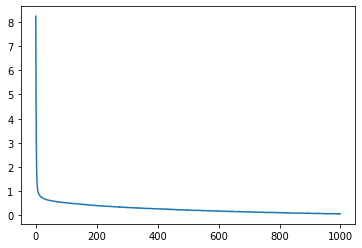

In [59]:
plt.plot(range(1000),model.history.__dict__['history']['loss'])

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ How is this phenomenon called ❓

Overfitting

---

🤔 What should we do to prevent this phenomena from happening ? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much on noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

In [62]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

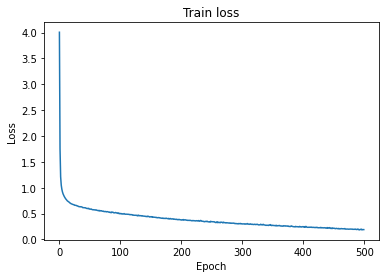

In [63]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set ? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So, let's move on to the next questions !

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">training set </span>and on <span style="color:orange">test set </span>. What can you comment on that ❓ 

In [64]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

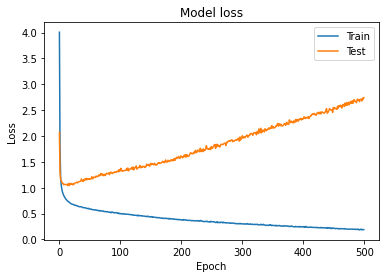

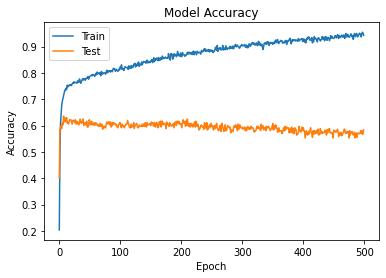

In [65]:
plot_loss_accuracy(history)

🤔 Why are Deep Learning models overfitting that easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~ 800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset ! 

😏 Deep Learning can clearly be a fancy but overkill and unnecessary option for an easy Machine Learning task!

⭐️ It will be extremely useful for:
- 📸 Image Preprocessing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations !

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge !